# Problem Framing

Task: Binary classification

Target label: Diagnosis = { Malignant (M), Benign (B) }

Goal: Predict diagnosis from 30 real-valued features (radius, texture, perimeter, etc.)

Metric focus: Balance classification correctness and medical sensitivity → accuracy + recall + F1

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Loading dataset

In [52]:
df=pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [53]:
print(X)

[[0.     0.     0.     ... 0.7119 0.2654 0.4601]
 [0.     0.     0.     ... 0.2416 0.186  0.275 ]
 [0.     0.     0.     ... 0.4504 0.243  0.3613]
 ...
 [0.     0.     0.     ... 0.3403 0.1418 0.2218]
 [0.     0.     0.     ... 0.9387 0.265  0.4087]
 [0.     0.     0.     ... 0.     0.     0.2871]]


In [54]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Cleaning

In [56]:
df.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [57]:
df.drop(columns=['Unnamed: 32'], inplace=True)
df.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


# Encoding

In [58]:
X = df.iloc[:, 2:-1].values
y = df.iloc[:, 1].values

In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

# Model Training

In [60]:
#splitting data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Logistic Regression

In [61]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [62]:
from sklearn.linear_model import LogisticRegression
log_class = LogisticRegression()
log_class.fit(X_train, y_train)

LogisticRegression()

In [63]:
y_pred = log_class.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [67]:
y_train_pred = log_class.predict(X_train)

# Confusion Matrix

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[71  0]
 [ 1 42]]


0.9912280701754386

# Visualisation

/tmp/ipython-input-1597400584.py:28: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set_2d[y_set_2d == j, 0], X_set_2d[y_set_2d == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


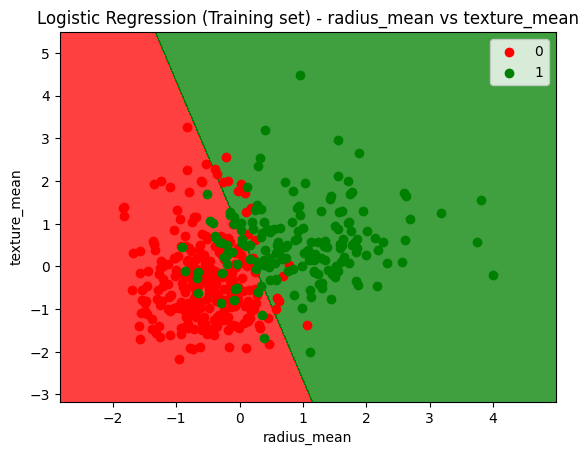

In [68]:
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

feature_name_x = df.columns[2]
feature_name_y = df.columns[3]

X_train_2d = X_train[:, :2]
y_train_2d = y_train

scaler_2d = StandardScaler()
X_train_2d_scaled = scaler_2d.fit_transform(X_train_2d)
log_class_2d = LogisticRegression()
log_class_2d.fit(X_train_2d_scaled, y_train_2d)

X_set_2d, y_set_2d = X_train_2d_scaled, y_train_2d

X1, X2 = np.meshgrid(np.arange(start = X_set_2d[:, 0].min() - 1, stop = X_set_2d[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set_2d[:, 1].min() - 1, stop = X_set_2d[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, log_class_2d.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set_2d)):
    plt.scatter(X_set_2d[y_set_2d == j, 0], X_set_2d[y_set_2d == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

plt.title(f'Logistic Regression (Training set) - {feature_name_x} vs {feature_name_y}')
plt.xlabel(feature_name_x)
plt.ylabel(feature_name_y)
plt.legend()
plt.show()

# Training error and test error

In [71]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

train_error = 1 - train_accuracy
test_error = 1 - test_accuracy
print(train_error)
print(test_error)


0.01098901098901095
0.00877192982456143


# Generalisation Gap

In [73]:
gen_gap = test_error - train_error
print(gen_gap)

-0.002217081164449519


In [76]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("accuracy score:",accuracy_score(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred))
print("recall:",recall_score(y_test, y_pred))
print("f1:",f1_score(y_test, y_pred))


accuracy score: 0.9912280701754386
precision: 1.0
recall: 0.9767441860465116
f1: 0.9882352941176471


# Conclusion



*   From the performance metrics for the Logistic Regression model, we observe a very low training error of approximately 1.1% and an even slightly lower test error of about 0.88%.
*   The generalization gap is negative (-0.0022), indicating that the model performs marginally better on the test set than on the training set. This suggests that the model is neither overfitting nor underfitting.



# Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [78]:
y_pred_tree = tree.predict(X_test)
y_pred_train=tree.predict(X_train)

In [79]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_tree)
print(cm)
accuracy_score(y_test, y_pred_tree)

[[70  1]
 [ 3 40]]


0.9649122807017544

In [81]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_tree)

train_error = 1 - train_accuracy
test_error = 1 - test_accuracy
print(train_error)
print(test_error)

0.0
0.03508771929824561


In [82]:
gen_gap = test_error - train_error
print(gen_gap)

0.03508771929824561


In [83]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("accuracy score:",accuracy_score(y_test, y_pred_tree))
print("precision:", precision_score(y_test, y_pred_tree))
print("recall:",recall_score(y_test, y_pred_tree))
print("f1:",f1_score(y_test, y_pred_tree))


accuracy score: 0.9649122807017544
precision: 0.975609756097561
recall: 0.9302325581395349
f1: 0.9523809523809523




*   For the Decision Tree model, we observe a training error of 0.0% (100% accuracy on the training set) and a test error of approximately 3.51%. The generalization gap is 0.0351, which is positive.
*   This significant positive generalization gap, along with perfect performance on the training data, indicates that the Decision Tree model is overfitting the training data



# Which model performs better

Comparing the performance of both models:

Logistic Regression Model:

    Accuracy: 0.9912
    Precision: 1.0
    Recall: 0.9767
    F1-Score: 0.9882
    Generalization Gap: -0.0022 (indicates excellent generalization, slightly better on test data)


Decision Tree Model:

    Accuracy: 0.9649
    Precision: 0.9756
    Recall: 0.9302
    F1-Score: 0.9523
    Generalization Gap: 0.0351 (indicates overfitting, significantly worse on test data)


The Logistic Regression model performs significantly better than the Decision Tree model in classifiying cancer cells into benign and malignant because of its overal high performance scores and better generalisation. In contrast decision tree is overfitted


# ML issues relevant here



*   Feature Correlation (Multicollinearity): Features like radius_mean and perimeter_mean are often highly correlated. This can complicate interpreting individual feature impacts on the model and can affect model stability, though not always predictive performance.
*  Class Imbalance: It's common in medical datasets for one class (e.g., malignant) to be much rarer than another (benign). This can lead models to perform well on the majority class but poorly on the critical minority class, leading to issues like high false negatives, which is particularly problematic in cancer diagnosis.



### Checking for Class Imbalance

In [84]:
import numpy as np

unique, counts = np.unique(y, return_counts=True)
class_distribution = dict(zip(unique, counts))

print("Class distribution (0: Benign, 1: Malignant):")
print(class_distribution)

total_samples = len(y)
for class_label, count in class_distribution.items():
    percentage = (count / total_samples) * 100
    print(f"Class {class_label}: {count} samples ({percentage:.2f}%) ")

Class distribution (0: Benign, 1: Malignant):
{np.int64(0): np.int64(357), np.int64(1): np.int64(212)}
Class 0: 357 samples (62.74%) 
Class 1: 212 samples (37.26%) 


The dataset shows a class distribution of approximately 62.74% Benign (Class 0) and 37.26% Malignant (Class 1). This distribution, while not severely skewed, is considered an imbalanced dataset.